In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install evaluate

In [ ]:
import numpy as np

In [ ]:
!pip install Unidecode
!pip install -U sentence-transformers
!pip install transformers
import pandas as pd
import string
import re, unidecode
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text
def remove_accented_chars(text):
    text = unidecode.unidecode(text)
    return text
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
def remove_slash_with_space(text):
    return text.replace('\\', " ")
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
def text_lowercase(text):
    return text.lower()
def remove_whitespace(text):
    return  " ".join(text.split())
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)
def stem_words(text):
    stemmer = PorterStemmer()
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return ' '.join(stems)
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return ' '.join(lemmas)

In [ ]:
def perform_preprocessing(text):
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = remove_numbers(text)
    #text = remove_stopwords(text)
    text = text_lowercase(text)
    text = remove_slash_with_space(text)
    text = remove_punctuation(text)
    #text = stem_words(text)
    #text = lemmatize_words(text)
    text = remove_whitespace(text)
    return text

In [ ]:
def sentenceEmbedder(sentence):

  from sentence_transformers import SentenceTransformer
  model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

  #Sentences are encoded by calling model.encode()
  embedding = model.encode(sentence)
  return embedding

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Particiapants_Data_DCAC/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Particiapants_Data_DCAC/test.csv")
train_x = train.iloc[:,1]
train_y = train.iloc[:,-1]
test_x = test.iloc[:,1]
train_x = train_x.apply(perform_preprocessing)
test_x = test_x.apply(perform_preprocessing)
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
test_x = test_x.to_numpy()

In [ ]:
embedding_train = sentenceEmbedder(train_x)
embedding_test = sentenceEmbedder(test_x)

In [ ]:
print(embedding_train.shape)
print(embedding_test.shape)

(12652, 384)
(1000, 384)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(embedding_train, train_y, test_size=0.25, random_state=1, shuffle=True)

### KNN

Maximum accuracy:- 0.6035409421435346 at K = 25


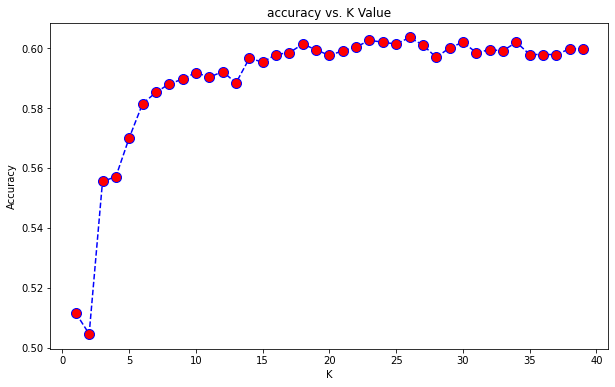

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = knn.predict(X_val)
    acc.append(metrics.accuracy_score(y_val, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
#knn.fit(X_train, y_train)
knn.fit(embedding_train, train_y)

KNeighborsClassifier(n_neighbors=25)

In [ ]:
predictions = knn.predict(X_val)
knn.score(X_val, y_val)

0.6380018969332911

In [ ]:
predictions = knn.predict(embedding_test)

In [ ]:
predictions.shape

(1000,)

In [ ]:
results = pd.DataFrame(predictions)
with open('submission_file.csv', 'w') as f:
     f.write('label\n')
results.to_csv('submission_file.csv', index=False, header=False, mode='a')
results.shape

(1000, 1)